Q1. Tan Chapter 2, Problem 8. Discuss why a document-term matrix is an example of
a data set that has asymmetric discrete or asymmetric continuous features. [10 pts]


Answer:

The value of the i,jth entry of a document-term matrix is the number of times the jth term occurs in the iih document. The data was processed using standard techniques to remove common words, to adjust for the different frequencies with which terms appear and to adjust for the different lengths of documents.

Most documents contain only a small fraction of all the possible terms, and hence, zero entries are not very meaningful, either in describing or comparing documents. Thus, a document-term matrix has asymmetric discrete features. If we apply a TFIDF normalization to terms and normalize the documents to have an L2 norm of 1, then this creates a term-document matrix with continuous features. However, the features are still asymmetric because these transformations do not create non-zero entries for any entries that were previously 0, and thus, zero entries are still not very meaningful.


Q2. Tan Chapter 2, Problem 12. Distinguish between noise and outliers. Be sure to consider the following questions. [10 pts]

• Is noise ever interesting or desirable? Outliers?

Answer: 
i. By definition, noise is never desirable. It distorts the original attribute values.  
ii. Outliers can be interesting and desriable. They can be legitimate values and even finding outliers can be the task of some data mining problems. 

• Can noise objects be outliers?

Answer: Random distortion of the data is often responsible for outliers. Noise can make the data look more randomized and unusual. Therefore, noise objects can be outliers. 

• Are noise objects always outliers?

Answer: Noisy data can appear as normal data. Random distortion can result in an object or value much like a normal one. Hence, noise objects are not always outliers. 

• Are outliers always noise objects?

Answer: Often outliers merely represent a class of objects that are different from normal objects. Outliers can be legitimate data objects that appear to not belong in the data set. Those outliers would typically not classify as noise objects. Hence, outliers are not always noise objects. 

• Can noise make a typical value into an unusual one, or vice versa?

Answer: Noise can make a typical value into an unusual one and vice versa. The source of noise in data can randomly make some values appear as unusual or some outliers as typical data objects. Hence, noise can make a typical value into an unusual one and vice versa. 

Q3. Implement a notebook on Kaggle to explore this dataset. This dataset lists the
number of antibiotic resistance genes (AMR), and the presence or absence of the
CRISPR-Cas systems in the genomes included in the file. Report what you have
learned by including the html output from your notebook in the PDF file you are
going to submit. What to check? The distribution of the two variables (AMR,
CRISPR-Cas), and if there is any correlation between the two variables. [25 pts]


First, we will import all the required libraries. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Then we will read the data from the csv and get the gist of the dataset. 

In [2]:
amr_data = pd.read_csv("Efaecium_AMRC.csv")

# Gist of the dataset
amr_data.head()

,genome_ID,CRISPR_Cas,AMR
0,GCA_010120755.1_ASM1012075v1,0,8
1,GCA_001720945.1_ASM172094v1,0,21
2,GCA_009697285.1_ASM969728v1,0,13
3,GCA_900639535.1_E8202_hybrid_assembly,0,11
4,GCA_002007625.1_ASM200762v1,0,18


In [3]:
amr_data

,genome_ID,CRISPR_Cas,AMR
0,GCA_010120755.1_ASM1012075v1,0,8
1,GCA_001720945.1_ASM172094v1,0,21
2,GCA_009697285.1_ASM969728v1,0,13
3,GCA_900639535.1_E8202_hybrid_assembly,0,11
4,GCA_002007625.1_ASM200762v1,0,18
...,...,...,...
2218,GCA_001058635.1_ASM105863v1,0,24
2219,GCA_900148625.1_Hp_24-1_05,0,16
2220,GCA_000981965.1_ASM98196v1,0,0
2221,GCA_002158235.1_ASM215823v1,0,10


We will describe the datatypes of all the columns present. 

In [20]:
amr_data.dtypes

genome_ID     object
CRISPR_Cas     int64
AMR            int64
dtype: object

We can see that the column "CRISPR_Cas" is a binary attribute with only 2 values: 0 and 1. All columns have nominal attributes in them. 

We'll use the describe function in pandas to find the mean, minimum, maximum, etc. of each column. 

In [4]:
amr_data.describe(include='all')

,genome_ID,CRISPR_Cas,AMR
count,2223,2223.000000,2223.000000
unique,2223,NaN,NaN
top,GCA_002945895.1_ASM294589v1,NaN,NaN
freq,1,NaN,NaN
mean,NaN,0.024741,10.330184
std,NaN,0.155371,6.661470
min,NaN,0.000000,0.000000
25%,NaN,0.000000,3.000000
50%,NaN,0.000000,12.000000
75%,NaN,0.000000,16.000000


In [5]:
amr_data.columns = ['genome_ID', 'CRISPR_Cas', 'AMR']

# Distribution

First, we plot a histogram that shows the distribution of the attribute values. 

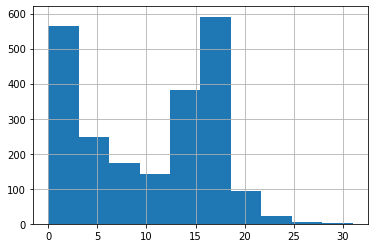

In [6]:
#distribution
amr_data['AMR'].hist(bins=10)

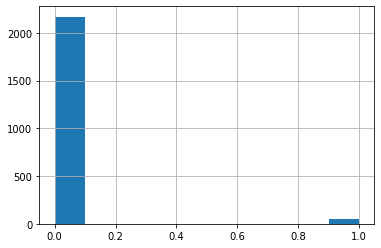

In [7]:
#distribution
amr_data['CRISPR_Cas'].hist(bins=10)

We will also show the distribution of values for each attribute using boxplot

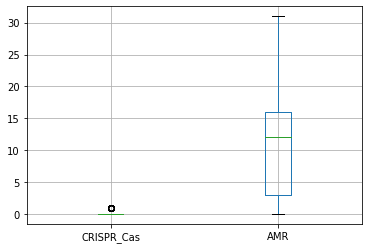

In [8]:
#distribution
amr_data.boxplot()

For each pair of attributes, we can use a scatter plot to visualize their joint distribution.

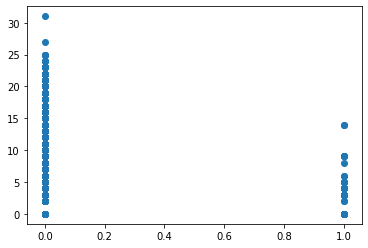

In [9]:

x=amr_data['CRISPR_Cas'].tolist()
y=amr_data['AMR'].tolist()
plt.scatter(x, y)
plt.show()

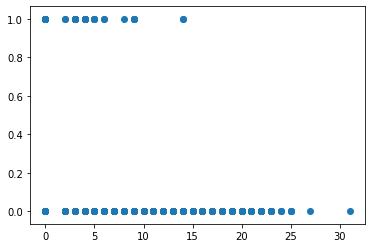

In [10]:
y=amr_data['CRISPR_Cas'].tolist()
x=amr_data['AMR'].tolist()
plt.scatter(x, y)
plt.show()

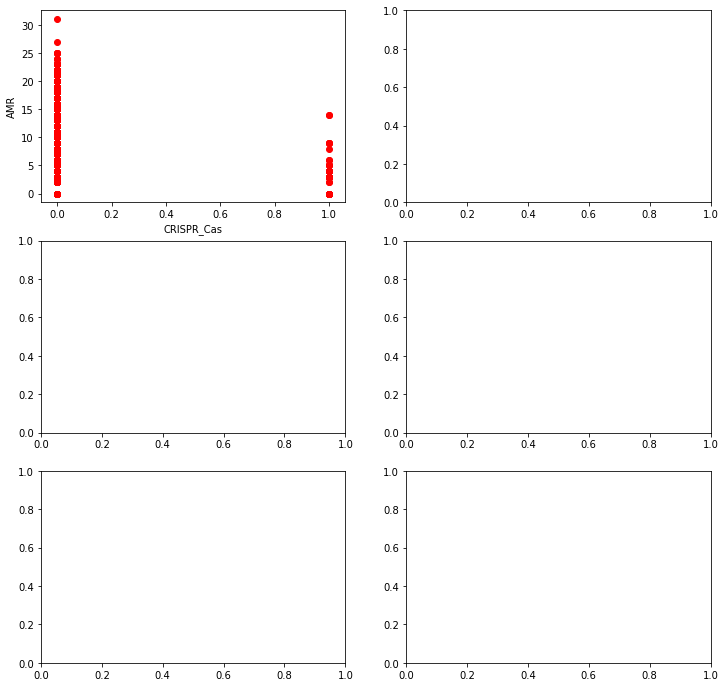

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
ax1 = int(index/2)
ax2 = index % 2
axes[ax1][ax2].scatter(amr_data[amr_data.columns[1]], amr_data[amr_data.columns[2]], color='red')
axes[ax1][ax2].set_xlabel(amr_data.columns[1])
axes[ax1][ax2].set_ylabel(amr_data.columns[2])
index = index + 1

We will now find the correlation between the two columns. 

In [29]:
print('Correlation:')
amr_data.corr()

Correlation:


,CRISPR_Cas,AMR
CRISPR_Cas,1.000000,-0.156173
AMR,-0.156173,1.000000


The correlation matrix shows the following information

            x-values    y-values
            
x-values    1.00000     -0.156173

y-values   -0.156173    1.00000

The negative value of correlation coefficient indicates how much the 2 variables move in opposite directions. An increase in CRISPR_Cas means a decrease in AMR and vice versa.

Q4. Learn about Omicron using Google Trend. Write a brief summary including four highlights of what you have learned. [25 pts].
(Solved in PDF)


Q5. Write a summary for this paper: COVID-19 or Flu? Discriminative Knowledge
Discovery of COVID-19 Symptoms from Google Trends Data. [30 pts]

• The length of your summary is about one page.

• State main ideas: problem that the paper tries to address, what data was used,
and what was the method that was applied/developed to solve the problem?

• Add your personal opinion. Do you like the paper or not? Why? How do you
think about the paper?


• Write the summary in your own words; don’t copy and paste. 

(Solved in PDF)
